# Data Cleansing for Neural Network and LSTM

## 1. Import Library
(Ini baru library buat neural network, library buat yang LSTM silakan sesuaikan)

In [6]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install Sastrawi


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Library for Dataset Preparation, Processing, and Visualization
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sn
from wordcloud import WordCloud

# Stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Library for Machine Learning Model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neural_network import MLPClassifier

# Pickle
import pickle

# Testing and Cross Validation
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

## 2. Prepare Datasets

### a. Train Dataset (train_preprocess.tsv.txt)

In [2]:
df_train= pd.read_csv('train_preprocess.tsv.txt', sep='\t', names=['text', 'sentiment'])
df_train

,text,sentiment
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [3]:
df_train.shape

(11000, 2)

In [5]:
df_train.sentiment.value_counts()

sentiment
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

### b. Test Dataset (data.csv)

In [6]:
df_test = pd.read_csv('data.csv', encoding='latin-1')
df_test = df_test[['Tweet']]
df_test = df_test.rename(columns = {'Tweet' :'text'})
df_test['text'].astype(str)
df_test.head()

,text
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...


In [8]:
df_test.shape

(13169, 1)

### c. Slang Words (new_kamusalay.csv)

In [10]:
df_slang = pd.read_csv('new_kamusalay.csv', encoding='latin-1', names=['slang', 'normal'])
df_slang

,slang,normal
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
...,...,...
15162,mendikbud,menteri pendidikan dan kebudayaan
15163,mendag,menteri perdagangan
15164,menaker,menteri tenaga kerja
15165,memetwit,mentwit


In [11]:
df_slang.shape

(15167, 2)

### d. Stopwords

In [12]:
pip install nltk


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install Sastrawi

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
print(stopwords.words('indonesian'))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

[nltk_data] Downloading package stopwords to C:\Users\Yosef B.
[nltk_data]     Pakpahan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
df_stop = pd.read_csv('stopwordbahasa.csv', encoding = 'latin-1', header = None)
df_stop.head()

,0
0,ada
1,adalah
2,adanya
3,adapun
4,agak


In [16]:
text = '''warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !'''
#mengubah teks menjadi huruf kecil 
text = text.lower() 
print(text)

warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !


In [17]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords from NLTK for bahasa Indonesia
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('indonesian')

# Read the TSV file into a DataFrame
file_path = 'train_preprocess.tsv.txt'
df = pd.read_csv(file_path, sep='\t')

# Print the column names and the first few rows of the DataFrame
print("Column Names:", df.columns)
print("\nFirst Few Rows:")
print(df.head())

# Check if the 'text' column exists
if 'text' in df.columns:
    # Define the preprocessing function
    def preprocess_text(text):
        # Tokenization
        words = word_tokenize(text, language='indonesian')
        
        # Remove stopwords
        stop_words = set(stopwords.words('indonesian'))
        words = [word for word in words if word.lower() not in stop_words]
        
        # Join back the processed words
        processed_text = ' '.join(words)
        
        return processed_text

    # Apply the preprocessing function to the 'text' column and create a new column
    df['processed_text'] = df['text'].apply(preprocess_text)

    # Save the preprocessed DataFrame to a new TSV file
    output_file_path = 'train_preprocess_result.tsv'
    df.to_csv(output_file_path, sep='\t', index=False)
else:
    print("The 'text' column does not exist in the DataFrame.")


Column Names: Index(['warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !', 'positive'], dtype='object')

First Few Rows:
  warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !  \
0  mohon ulama lurus dan k212 mmbri hujjah partai...                                                               

[nltk_data] Downloading package stopwords to C:\Users\Yosef B.
[nltk_data]     Pakpahan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Yosef B.
[nltk_data]     Pakpahan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Error loading indonesian: Package 'indonesian' not found
[nltk_data]     in index


### e. wordcloud

In [18]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

In [20]:
f = open("train_preprocess.tsv.txt", "r")

isi_text = f.read()

In [21]:
print(isi_text)

warung ini dimiliki oleh pengusaha pabrik tahu yang sudah puluhan tahun terkenal membuat tahu putih di bandung . tahu berkualitas , dipadu keahlian memasak , dipadu kretivitas , jadilah warung yang menyajikan menu utama berbahan tahu , ditambah menu umum lain seperti ayam . semuanya selera indonesia . harga cukup terjangkau . jangan lewatkan tahu bletoka nya , tidak kalah dengan yang asli dari tegal !	positive
mohon ulama lurus dan k212 mmbri hujjah partai apa yang harus diwlh agar suara islam tidak pecah-pecah	neutral
lokasi strategis di jalan sumatera bandung . tempat nya nyaman terutama sofa di lantai 2 . paella nya enak , sangat pas dimakan dengan minum bir dingin . appetiser nya juga enak-enak .	positive
betapa bahagia nya diri ini saat unboxing paket dan barang nya bagus ! menetapkan beli lagi !	positive
duh . jadi mahasiswa jangan sombong dong . kasih kartu kuning segala . belajar dulu yang baik , tidak usahlah ikut-ikut politik . nanti sudah selesai kuliah nya mau ikut politik 

In [22]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200, background_color='white')

In [23]:
wordcloud.generate(isi_text)

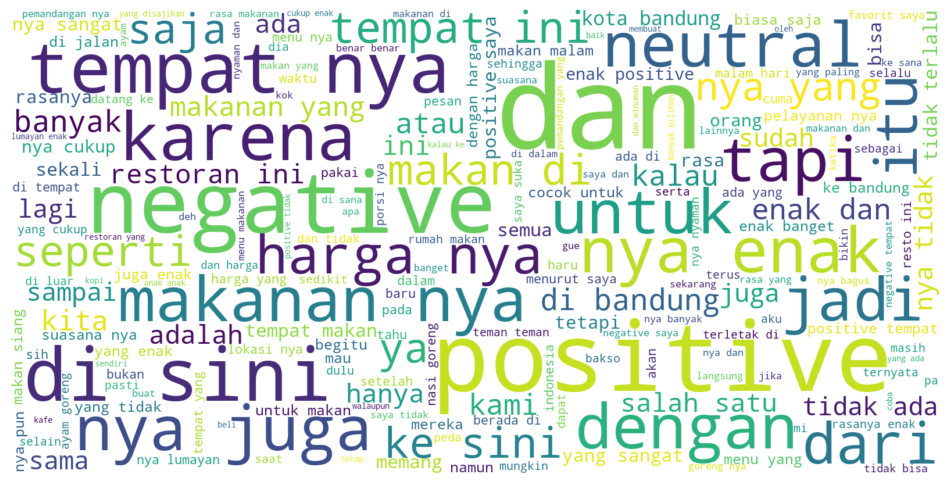

In [24]:
plt.figure(figsize=(12,10))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

### f. Abusive Words (abusive.csv)

In [25]:
df_abusive = pd.read_csv('abusive.csv', encoding='latin-1')
df_abusive.head()

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing


In [26]:
df_abusive.shape

(125, 1)

## 3. Text Normalization 

### a. Check Null Values

In [27]:
print('-------------------------------')
print('Training dataset Null Values :')
print(df_train.isnull().sum())
print('-------------------------------')

print('Test dataset Null Values :')
print(df_test.isnull().sum())
print('-------------------------------')

-------------------------------
Training dataset Null Values :
text         0
sentiment    0
dtype: int64
-------------------------------
Test dataset Null Values :
text    0
dtype: int64
-------------------------------


### b. Drop Duplicated Values

In [28]:
# Check duplicated values
print('------------------------------------------')
print('Training dataset duplicated Values :', df_train.duplicated().sum())
print('------------------------------------------')
print('Test dataset duplicated Values :', df_test.duplicated().sum())
print('------------------------------------------')

------------------------------------------
Training dataset duplicated Values : 67
------------------------------------------
Test dataset duplicated Values : 146
------------------------------------------


In [29]:
# Drop duplicated values
df.drop_duplicates(inplace = True, ignore_index= True)
print('----------------------------------------------------------------------')
print('Jumlah Duplicated Values pada Training Dataset setelah dibersihkan :', df_train.duplicated().sum())

print('----------------------------------------------------------------------')

df_test.drop_duplicates(inplace = True, ignore_index = True)
print('Jumlah Duplicated Values pada Test Dataset setelah dibersihkan :', df_test.duplicated().sum())
print('----------------------------------------------------------------------')

----------------------------------------------------------------------
Jumlah Duplicated Values pada Training Dataset setelah dibersihkan : 67
----------------------------------------------------------------------
Jumlah Duplicated Values pada Test Dataset setelah dibersihkan : 0
----------------------------------------------------------------------


In [30]:
# Check total data after drop duplicated values
print('----------------------------------------------------')
print('Jumlah Data Train tanpa Duplicated Values', df_train.shape)
print('----------------------------------------------------')
df_test.shape
print('Jumlah Data Test tanpa Duplicated Values', df_test.shape)
print('----------------------------------------------------')

----------------------------------------------------
Jumlah Data Train tanpa Duplicated Values (11000, 2)
----------------------------------------------------
Jumlah Data Test tanpa Duplicated Values (13023, 1)
----------------------------------------------------


### c. Cleansing Data

In [31]:
def Cleansing(text):

     # Regex
    text = text.lower() # membuat semua huruf menjadi lowercase
    text = text.strip() # menghapus spasi pada awal dan akhir kalimat
    text = re.sub('\n', ' ', text) # menghilangkan new line
    text = re.sub('x[a-z0-9]{,2}',' ', text) # menghilangkan rawstring emoji
    text = re.sub('user', ' ', text) # menghilangkan mention USER tertentu
    text = re.sub('url', ' ', text) # menghilangkan teks 'url' pada teks
    text = re.sub('http\S+', '', text) # menghilangkan url
    text = re.sub('[^0-9a-zA-Z]+', ' ', text) # menghilangkan non-alpha numerik
    text = re.sub('( rt )|(rt )', ' ', text) # menghilangkan retweet
    text = re.sub('  +', ' ', text) # Menghilangkan spasi berlebih

    # Slangwords Normalization
    Slang_dict = dict(zip(df_slang['slang'], df_slang['normal']))  # Membuat dataframe slang menjadi dict
    holder = [] # variabel list untuk menyimpan kata slang yang sudah dinormalkan

    #pengulangan untuk mengubah word slang menjadi word yang sesuai pada dict
    for word in text.split(' '):

        if word in Slang_dict.keys():
            word = Slang_dict[word] # mengubah kata slang menjadi kata yang sesuai pada dict
            holder.append(word) # simpan kata slang yang sudah normal ke variabel holder
        else :
            holder.append(word)

    text = ' '.join(holder) # mengembalikan satu kalimat yang sudah digabungkan dari list huruf pada holder

    # Stopwords Removal
    factory = StopWordRemoverFactory()
    stopwords = factory.get_stop_words()
    stopword = factory.create_stop_word_remover()
    text = stopword.remove(text)
    text = re.sub(' +', ' ', text) # menghilangkan spasi berlebih
    text = text.strip() # menghilangkan whitespace pada awal dan akhir string

    return text

In [32]:
df_train['text_clean'] = df_train['text'].apply(Cleansing)
df_train.head()

,text,sentiment,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung dimiliki pengusaha pabrik tahu sudah pu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus k212 mmbri hujjah partai apa...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis jalan sumatra bandung tempat ...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri saat unbo paket barang...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,aduh jadi mahasiswa jangan sombong dong kasih ...


In [33]:
data_preprocessed = df_train['text_clean'].tolist()

In [34]:
import re
def cleansing(sent):
    string = sent.lower()
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

df_train['text_clean'] = df_train.text.apply(cleansing)

df_train.head(10)

,text,sentiment,text_clean
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung t...
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kas...
5,"makanan beragam , harga makanan di food stall ...",positive,makanan beragam harga makanan di food stall ...
6,pakai kartu kredit bca tidak untung malah rugi...,negative,pakai kartu kredit bca tidak untung malah rugi...
7,"tempat unik , bagus buat foto , makanan enak ,...",positive,tempat unik bagus buat foto makanan enak ...
8,saya bersama keluarga baru saja menikmati peng...,positive,saya bersama keluarga baru saja menikmati peng...
9,bersyukur,positive,bersyukur


In [35]:
import re
def cleansing(sent):
    string = sent.lower()
    string = re.sub(r'[^a-zA-Z0-9]', ' ', string)
    return string

df_test['text_clean'] = df_test.text.apply(cleansing)

df_test.head(10)

,text,text_clean
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt user user siapa yang telat ngasih tau elu ...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap perc...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,user user aku itu aku n nku tau matamu sipit t...
4,USER USER Kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,user ya bani taplak dkk xf0 x9f x98 x84 xf0 x...
6,deklarasi pilkada 2018 aman dan anti hoax warg...,deklarasi pilkada 2018 aman dan anti hoax warg...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,gue baru aja kelar re watch aldnoah zero pa...
8,Nah admin belanja satu lagi port terbaik nak m...,nah admin belanja satu lagi port terbaik nak m...
9,USER Enak lg klo smbil ngewe',user enak lg klo smbil ngewe


In [36]:
df_train.sentiment.value_counts()

sentiment
positive    6416
negative    3436
neutral     1148
Name: count, dtype: int64

## d. Exploratory Data Analysis after text normalization

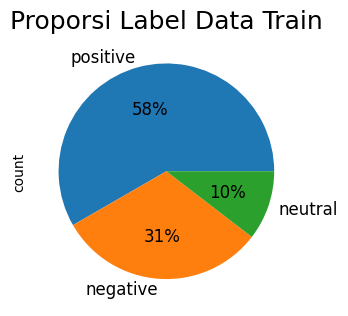

In [37]:
# Mendeskripsikan persentase label dari data train 
df_train['sentiment'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(3.5,3.5), fontsize=12)
plt.title('Proporsi Label Data Train', fontsize=18)
plt.show()

In [38]:
# Membuat kolom total char dan total word
df_train['total char'] = df_train['text_clean'].apply(lambda x : len(x))
df_train['total word'] = df_train['text_clean'].apply(lambda x : len(x.split()))
df_train.head()

,text,sentiment,text_clean,total char,total word
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive,warung ini dimiliki oleh pengusaha pabrik tahu...,404,56
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral,mohon ulama lurus dan k212 mmbri hujjah partai...,102,18
2,lokasi strategis di jalan sumatera bandung . t...,positive,lokasi strategis di jalan sumatera bandung t...,184,29
3,betapa bahagia nya diri ini saat unboxing pake...,positive,betapa bahagia nya diri ini saat unboxing pake...,93,15
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative,duh jadi mahasiswa jangan sombong dong kas...,214,32


In [39]:
# Mean total char dan total word

df_train[['total char', 'total word']].mean()
df_train[['total char', 'total word']].max()


total char    567
total word     96
dtype: int64

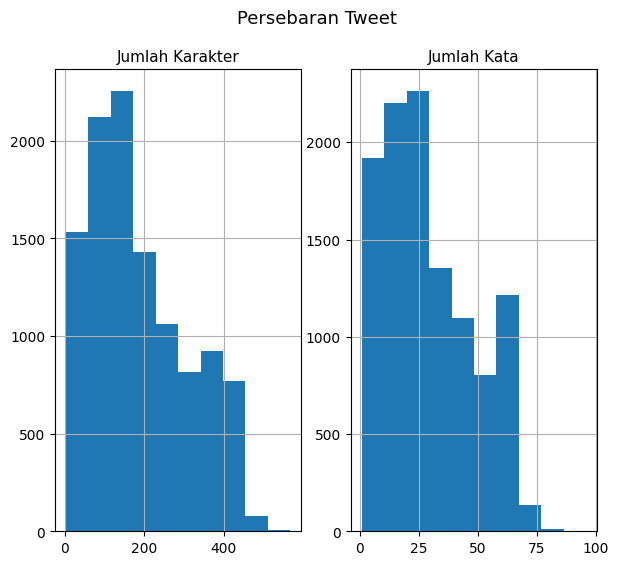

In [40]:
# Histogram Total Char and Total Word
fig, ax = plt.subplots(1,2, figsize=(7,6))
fig.suptitle('Persebaran Tweet', fontsize= 13)


df_train['total char'].hist(ax = ax[0])
ax[0].set_title('Jumlah Karakter', fontsize= 11)
df_train['total word'].hist(ax = ax[1])
ax[1].set_title('Jumlah Kata', fontsize= 11)

plt.show()

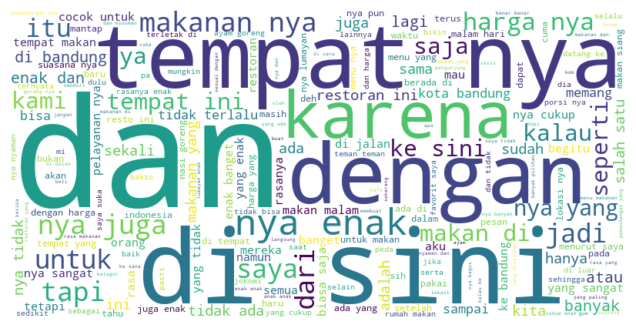

In [41]:
# Visualisasi kata yang sering muncul menggunakan wordcloud
text = df_train['text_clean'].str.cat(sep=' ')

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

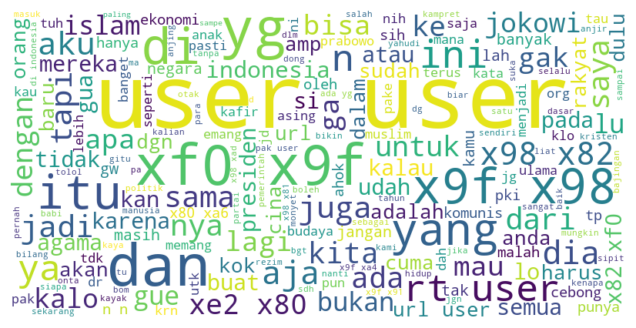

In [42]:
# Visualisasi kata yang sering muncul menggunakan wordcloud
text = df_test['text_clean'].str.cat(sep=' ')

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 4. Feature Extraction

In [43]:
# Vectorization --> dimana text "diubah" menjadi vector/numerical
# Nama dari proses ini adalah Feature Extraction

count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)

In [44]:
# import objek countvectorizer yg berisi vectorization process dari whole training data
# supaya, sebelum dilakukan prediction atas data baru nantinya, data text baru tsb bisa diubah menjadi vector/vectorization

import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

In [45]:
cv = CountVectorizer()
cv.fit(data_preprocessed)

X_cv = cv.transform(data_preprocessed)
X_cv

<11000x16162 sparse matrix of type '<class 'numpy.int64'>'
	with 219162 stored elements in Compressed Sparse Row format>

In [51]:
pickle.dump(cv, open("feature_cv.pkl", "wb"))

## 5. Split Prepare Train and Test Datasets

In [52]:
# Selanjutnya kita split datanya menjadi 80 data latih dan 20 data uji

# Impor Sklearn dan command untuk split dataset

from sklearn.model_selection import train_test_split

classes = df_train['sentiment']


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size = 0.2)

## 6. Model Training and Testing

In [54]:
# Training
from sklearn.neural_network import MLPClassifier


In [55]:
model = MLPClassifier()
model.fit(X_train, y_train)

In [ ]:
# dump model ke dalam file pickle
# Menyimpan data yang sudah diuji coba dalam sebuah file


pickle.dump(model, open("model.p","wb"))

In [ ]:
# testing

from sklearn.metrics import classification_report

test = model.predict(X_test)

In [ ]:
print(classification_report(y_test, test))

              precision    recall  f1-score   support

    negative       0.77      0.81      0.79       686
     neutral       0.80      0.63      0.71       242
    positive       0.88      0.90      0.89      1272

    accuracy                           0.84      2200
   macro avg       0.82      0.78      0.80      2200
weighted avg       0.84      0.84      0.84      2200



In [ ]:
# Metode yang kita pakai dalam evaluasi ini ada 4, yaitu Accuracy, Precision, Recall, dan F-1 Score. 
# Hasilnya F-1 Score punya nilai cukup bagus dibanding 3 metode lainnya. 
# Ini karena nilai F-1 pada masing-masing klasifikasi mulai dari 0.79 negatif, 0.71 netral dan 0.90 positif.


## 7. Cross Validation

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
import numpy as np
accuracies = []

y = classes

# Ini main part cross-validation
for iteration, data in enumerate(kf.split(X), start=1):

    data_train = X[data[0]]
    target_train = y[data[0]]

    data_test = X[data[1]]
    target_test = y[data[1]]

    clf = MLPClassifier()
    clf.fit(data_train, target_train)

    preds = clf.predict(data_test)

    accuracy = accuracy_score(target_test, preds)

    print("Training ke-", iteration)
    print(classification_report(target_test, preds))
    print("============================================")

    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)

print()
print()

print("Rata-rata Accuracy: ", average_accuracy)

Training ke- 1
              precision    recall  f1-score   support

    negative       0.78      0.78      0.78       680
     neutral       0.76      0.63      0.69       239
    positive       0.87      0.90      0.89      1281

    accuracy                           0.83      2200
   macro avg       0.81      0.77      0.79      2200
weighted avg       0.83      0.83      0.83      2200

Training ke- 2
              precision    recall  f1-score   support

    negative       0.80      0.77      0.78       706
     neutral       0.75      0.72      0.73       220
    positive       0.88      0.91      0.89      1274

    accuracy                           0.84      2200
   macro avg       0.81      0.80      0.80      2200
weighted avg       0.84      0.84      0.84      2200

Training ke- 3
              precision    recall  f1-score   support

    negative       0.79      0.81      0.80       682
     neutral       0.85      0.71      0.77       215
    positive       0.89      0

## 8. Model Prediction

In [ ]:
# Feature Extraction for Test Data
data_preprocessed_test = df_test['text_clean'].tolist()
X_cv_test = cv.transform(data_preprocessed_test) 

# Predict the label for Test Data
predict_test = model.predict(X_cv_test)

# Convert the Label Prediction to Dataframe
df_label = pd.DataFrame(predict_test, columns=['label'])

# Join the Label Prediction to original Test Dataframe
df_output = pd.concat([df_test,df_label], axis = 1) # Original Test Dataframe (Before Cleaning) + Label
df_output

,text,text_clean,label
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatia...,negative
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt user user siapa yang telat ngasih tau elu ...,negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap perc...,positive
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,user user aku itu aku n nku tau matamu sipit t...,negative
4,USER USER Kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...,negative
...,...,...,...
13018,USER jangan asal ngomong ndasmu. congor lu yg ...,user jangan asal ngomong ndasmu congor lu yg ...,negative
13019,USER Kasur mana enak kunyuk',user kasur mana enak kunyuk,negative
13020,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,user hati hati bisu g n nlagi bosan huft ...,negative
13021,USER USER USER USER Bom yang real mudah terdet...,user user user user bom yang real mudah terdet...,negative


In [ ]:
df_output.to_csv('output_nn.csv', index = False)

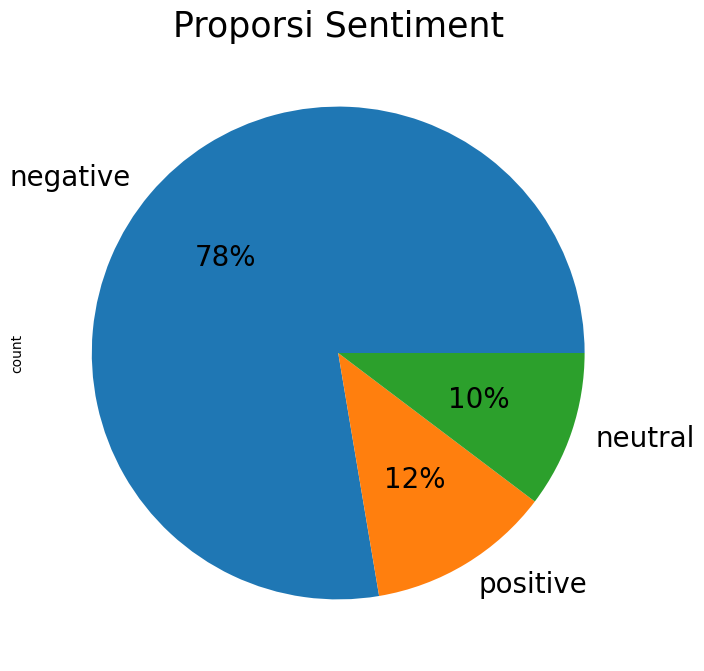

In [ ]:
# Pie Chart for Label Distribution Overview

df_output['label'].value_counts().plot(kind='pie', autopct='%1.00f%%', figsize=(8,8), fontsize = 20)
plt.title('Proporsi Sentiment', fontsize=25)
plt.show()